Processing Day01_T_06.jpg...
No Damage Detected


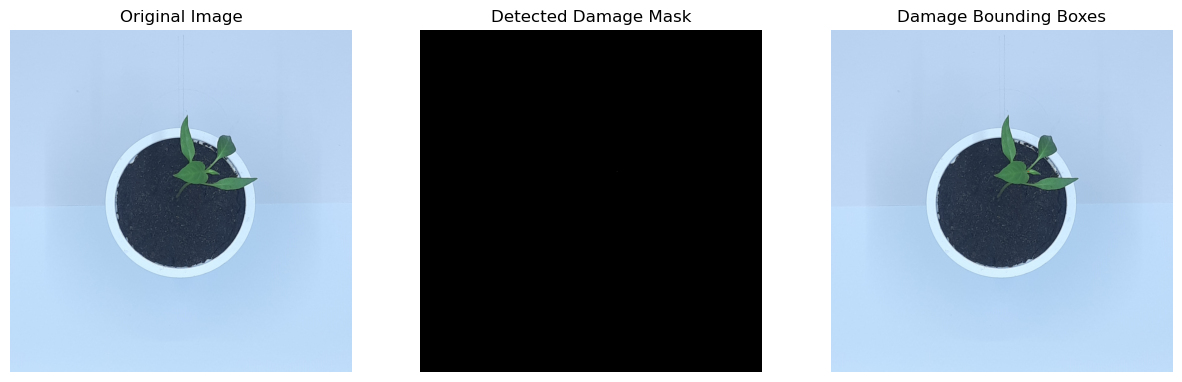

Processing Day02_T_06.jpg...
Leaf Damage Detected


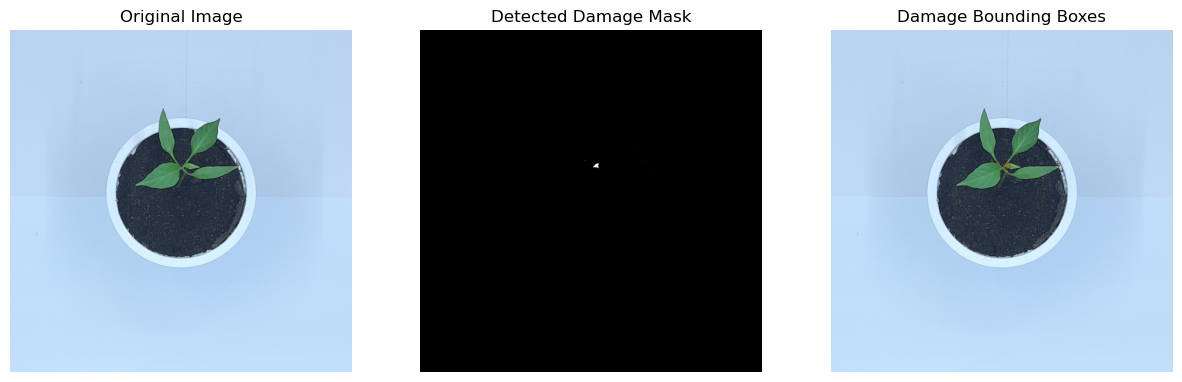

Processing Day03_T_06.jpg...
Leaf Damage Detected


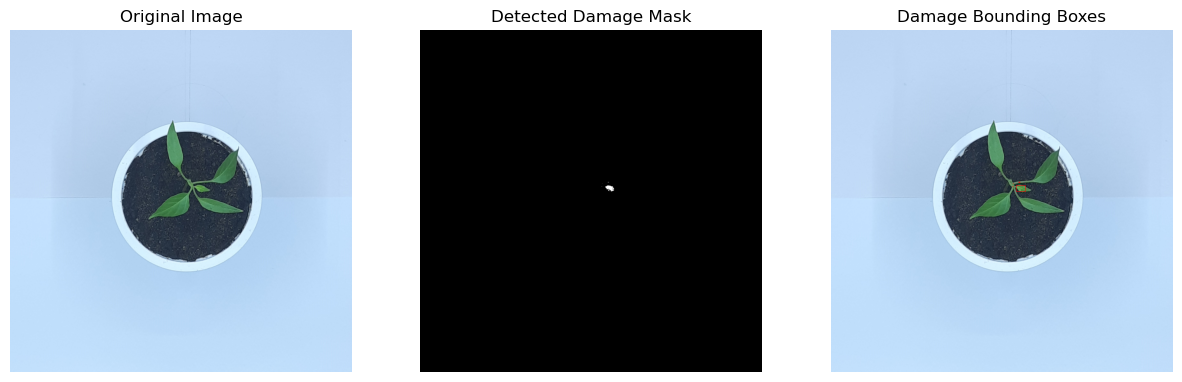

Processing Day04_T_06.jpg...
Leaf Damage Detected


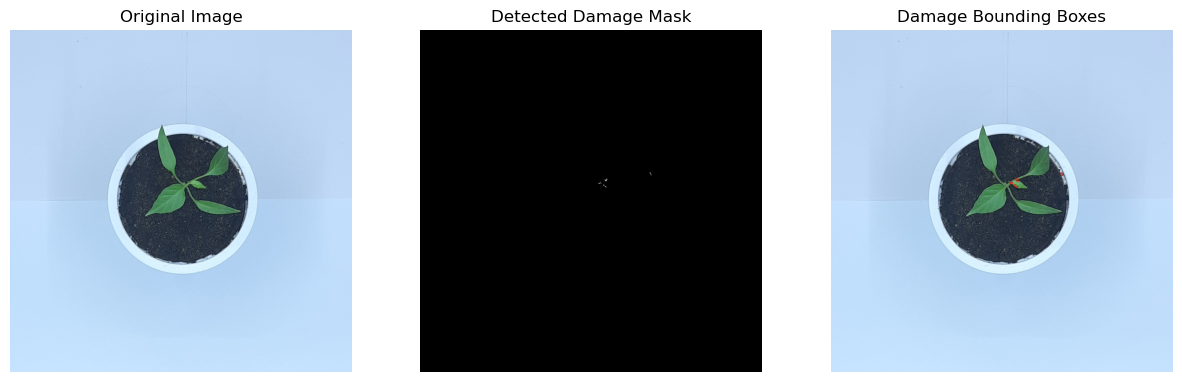

Processing Day05_T_06.jpg...
No Damage Detected


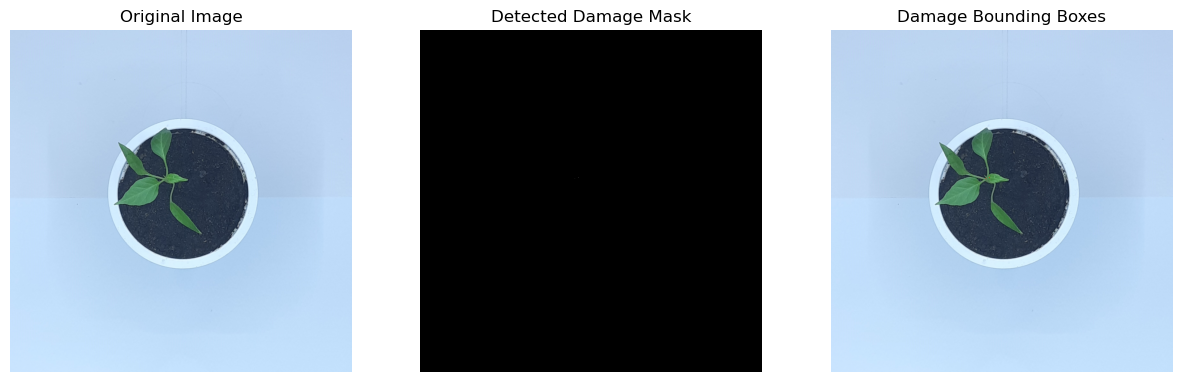

Processing Day06_T_06.jpg...
No Damage Detected


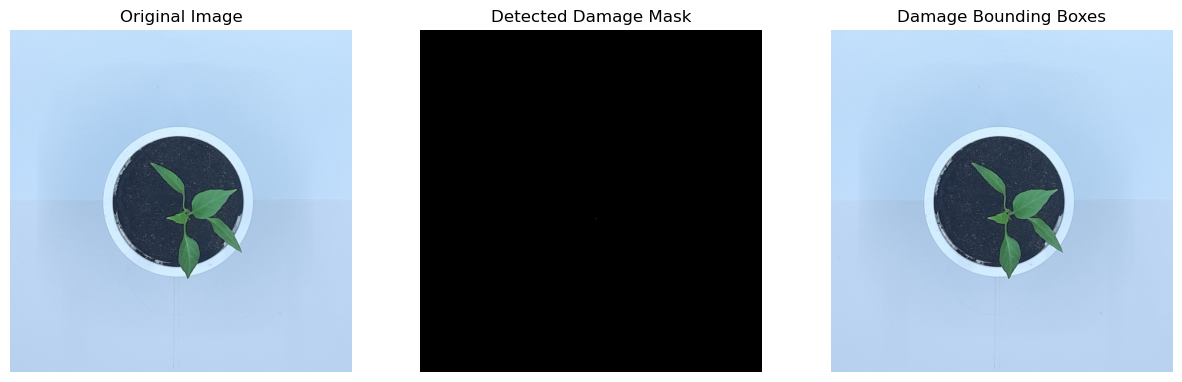

Processing Day07_T_06.jpg...
Leaf Damage Detected


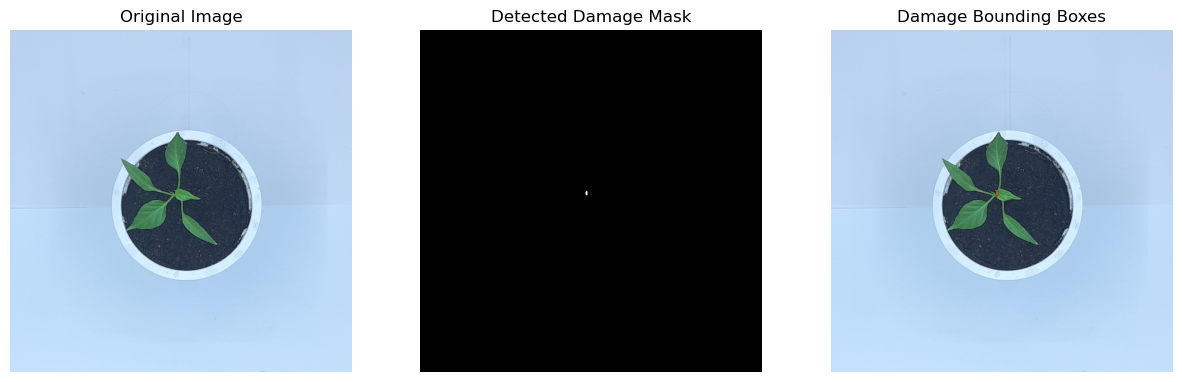

Processing Day08_T_06.jpg...
No Damage Detected


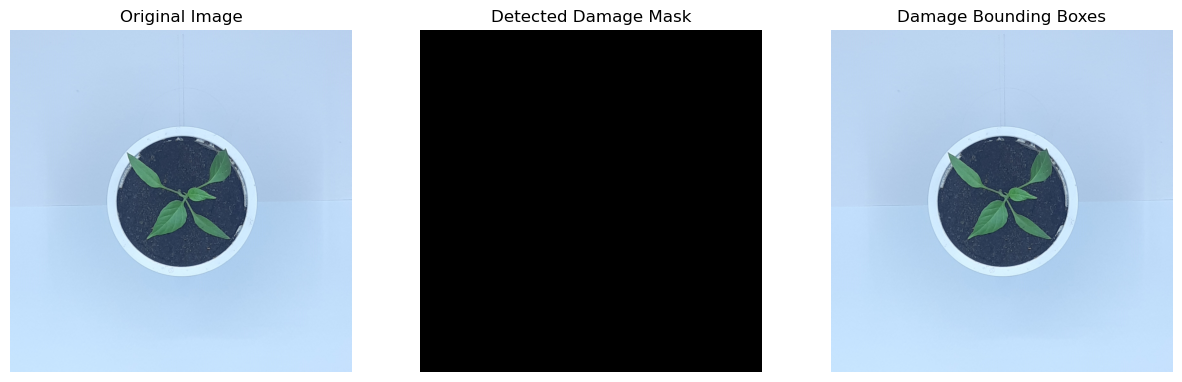

Processing Day09_T_06.jpg...
No Damage Detected


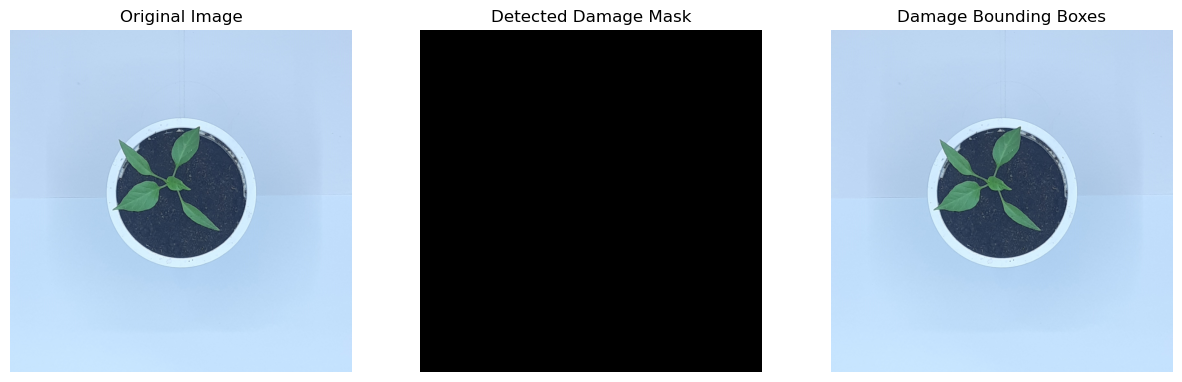

Processing Day10_T_06.jpg...
No Damage Detected


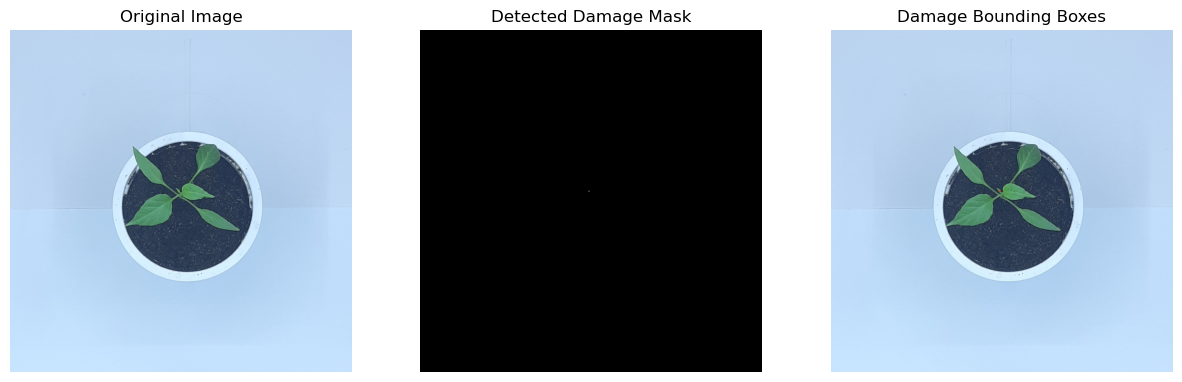

Processing Day11_T_06.jpg...
Leaf Damage Detected


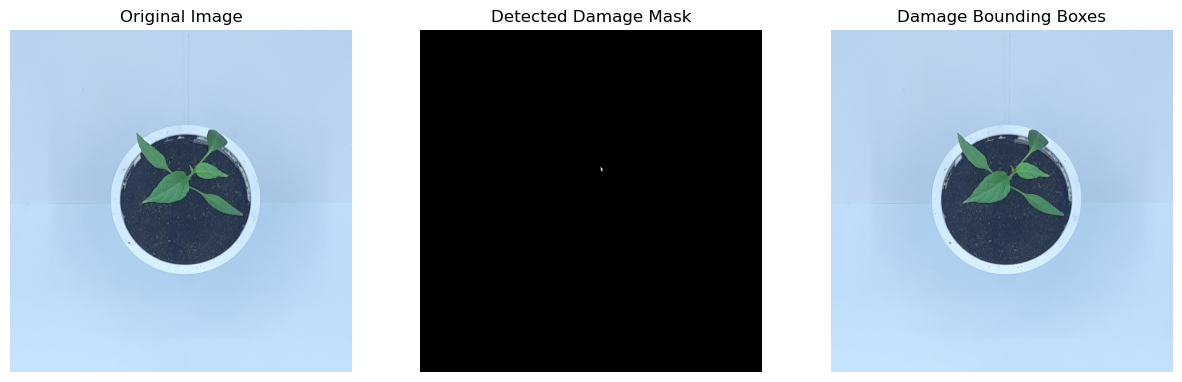

Processing Day12_T_06.jpg...
Leaf Damage Detected


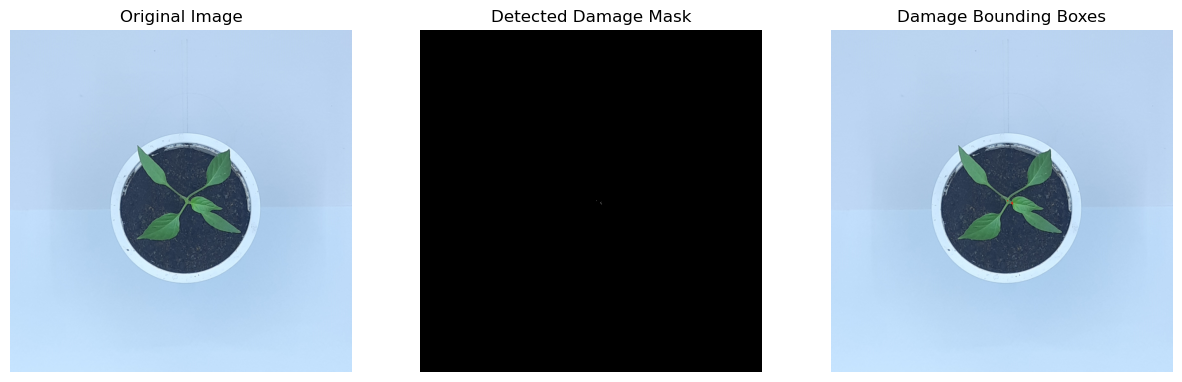

Processing Day13_T_06.jpg...
Leaf Damage Detected


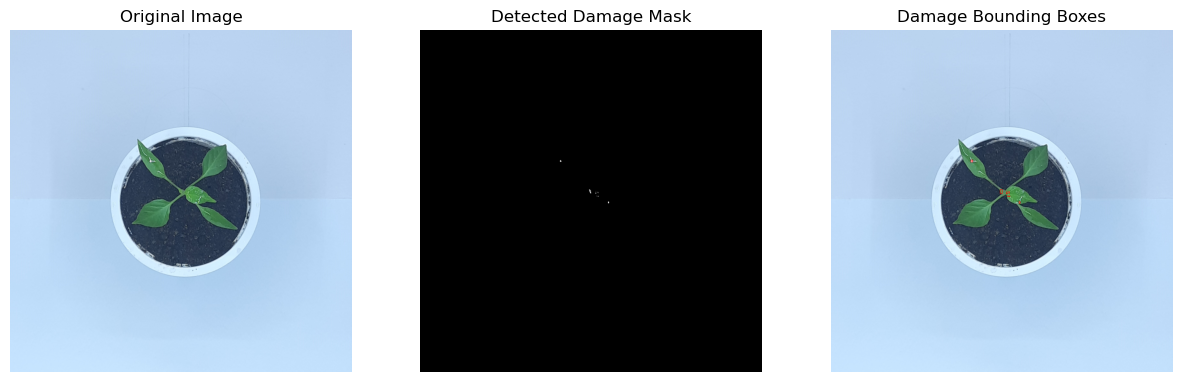

Processing Day14_T_06.jpg...
Leaf Damage Detected


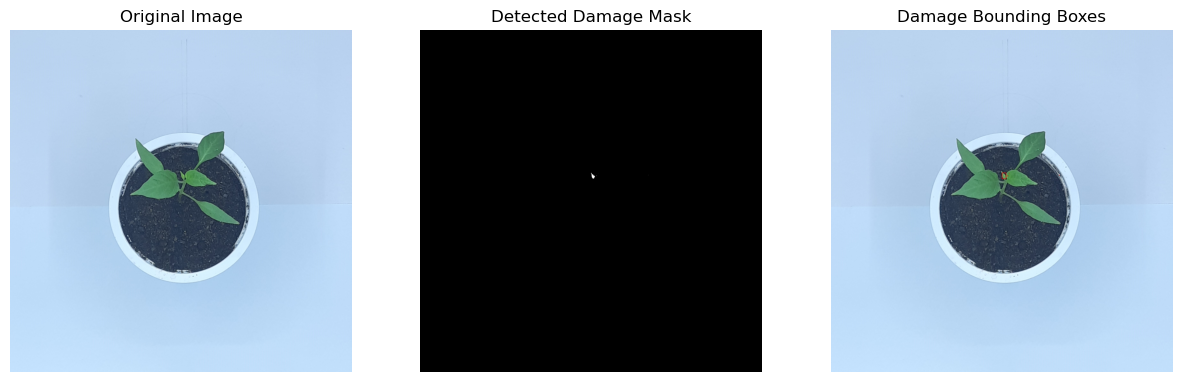

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def analyze_plant_health(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read {image_path}")
        return
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) 
    
    ###color thresholds###
    
    # yellow/Brown Patches
    lower_damage = np.array([5, 20, 20])
    upper_damage = np.array([55, 255, 255])
    mask_damage = cv2.inRange(hsv, lower_damage, upper_damage)
    
    # white Patches
    lower_white = np.array([0, 0, 190])  # high V value to avoid detecting white pots/backgrounds
    upper_white = np.array([180, 10, 255])  # low saturation to exclude bright non-damage areas
    mask_white = cv2.inRange(hsv, lower_white, upper_white)
    
    mask_combined = cv2.bitwise_or(mask_damage, mask_white)
    contours, _ = cv2.findContours(mask_combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # red bounding boxes
    result_image = image.copy()
    total_damage_area = 0
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(result_image, (x, y), (x + w, y + h), (255, 0, 0), 2) 
        total_damage_area += w * h
    
    # damage
    image_area = image.shape[0] * image.shape[1]
    damage_percentage = (total_damage_area / image_area) * 100
    if damage_percentage < 0.001:
        print("No Damage Detected")
    else:
        print("Leaf Damage Detected")
    
    # result
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    
    ax[1].imshow(mask_combined, cmap='gray')
    ax[1].set_title("Detected Damage Mask")
    ax[1].axis("off")
    
    ax[2].imshow(result_image)
    ax[2].set_title("Damage Bounding Boxes")
    ax[2].axis("off")
    
    plt.show()


directory = "input"
for day in range(1, 15):
    filename = f"Day{day:02d}_T_06.jpg"
    image_path = os.path.join(directory, filename)
    if os.path.exists(image_path):
        print(f"Processing {filename}...")
        analyze_plant_health(image_path)
    else:
        print(f"File {filename} not found.")
